# Seaborn

- Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

http://seaborn.pydata.org/

In [1]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = sns.load_dataset( 'titanic' ) # titanic dataset

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 회귀선 있는 산점도

- regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형 회귀 분석에 의한 회귀선을 함께 나타낸다.
- fit_reg = False 옵션을 설정하면 회귀선을 안 보이게 할 수 있다.

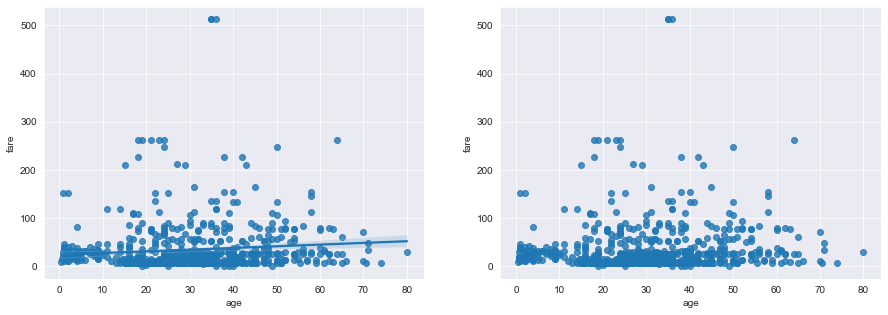

In [8]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style( 'darkgrid' )

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 15, 5 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot( x = 'age',        #x축 변수
             y = 'fare',       #y축 변수
             data = titanic,   #데이터
             ax = ax1 )         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot( x = 'age',        #x축 변수
             y = 'fare',       #y축 변수
             data = titanic,   #데이터
             ax = ax2,         #axe 객체 - 2번째 그래프        
             fit_reg = False )  #회귀선 미표시

plt.show()

 ## 히스토그램 / 커널 밀도 그래프
 
 - 단변수( 하나의 변수 ) 데이터의 분포를 확인할 때 distplot() 함수를 이용한다.
 - 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.
 - 커널 밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수이다.
 - hist = False 옵션을 추가하면 히스토그램이 표시되지 않고, kde = False 옵션을 전달하면 커널 밀도 그래프를 표시하지 않는다.

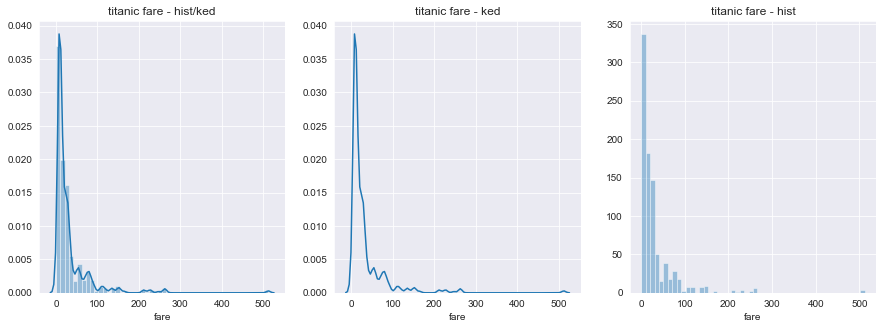

In [9]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style( 'darkgrid' )

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 15, 5 ) )   
ax1 = fig.add_subplot( 1, 3, 1 )
ax2 = fig.add_subplot( 1, 3, 2 )
ax3 = fig.add_subplot( 1, 3, 3 )
 
# 기본값
sns.distplot( titanic[ 'fare' ], ax = ax1 ) 

# hist=False
sns.distplot( titanic[ 'fare' ], hist = False, ax = ax2 ) 

# kde=False
sns.distplot( titanic[ 'fare' ], kde = False, ax = ax3 )        

# 차트 제목 표시
ax1.set_title( 'titanic fare - hist/ked' )
ax2.set_title( 'titanic fare - ked' )
ax3.set_title( 'titanic fare - hist' )

plt.show()

## 히트맵

- Seaborn 라이브러리는 heatmap을 그리는 heatmap() 메서드를 제공한다.
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류한다.
- 데이터프레임을 피벗테이블로 정리할 때 한 변수를 행 인덱스로 나머지 변수를 열 이름으로 설정한다.
- aggfunc = 'size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다.

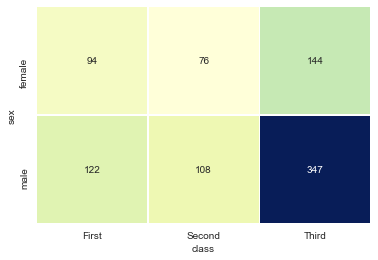

In [10]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style( 'darkgrid' )

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table( index =[ 'sex' ], columns = [ 'class' ], aggfunc = 'size' ) #히트맵의 사이즈값이라는 함수형식으로 표시.

# 히트맵 그리기
sns.heatmap( table,                    # 데이터프레임
             annot = True, fmt = 'd',  # 데이터 값 표시 여부, 정수형 포맷
             cmap = 'YlGnBu',          # 컬러 맵
             linewidth = .5,           # 구분 선
             cbar = False )             # 컬러 바 표시 여부

plt.show()

## 범주형 데이터 산점도

- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법이다. ex iris 품종    
- stripplot() 함수와 swarmplot() 함수를 사용할 수 있다.
- swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다. 즉, 데이터가 퍼져 있는 정도를 입체적으로 볼수 있다.
- hue = '변수' 옵션을 stripplot() 함수 또는 swarmplot() 함수에 추가하면 '변수' 열의 데이터 값으로 색상이 구분되어 출력된다.

d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


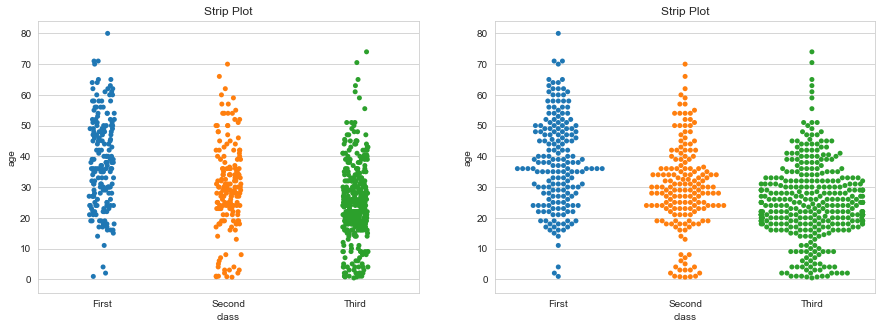

In [11]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style( 'whitegrid' )

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 15, 5 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot( x = "class",      #x축 변수
               y = "age",        #y축 변수           
               data = titanic,   #데이터셋 - 데이터프레임
               ax = ax1 )         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 분산이 표현되었기에 좀 더 입채적으로 보이는 것. 즉 퍼진 정도를 보겠다는 것.
sns.swarmplot( x = "class",      #x축 변수
               y = "age",        #y축 변수
               data = titanic,   #데이터셋 - 데이터프레임
               ax = ax2 )         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title( 'Strip Plot' )
ax2.set_title( 'Strip Plot' )

plt.show()

## 막대 그래프

- 막대 그래프를 그리려면 barplot() 함수를 사용한다.

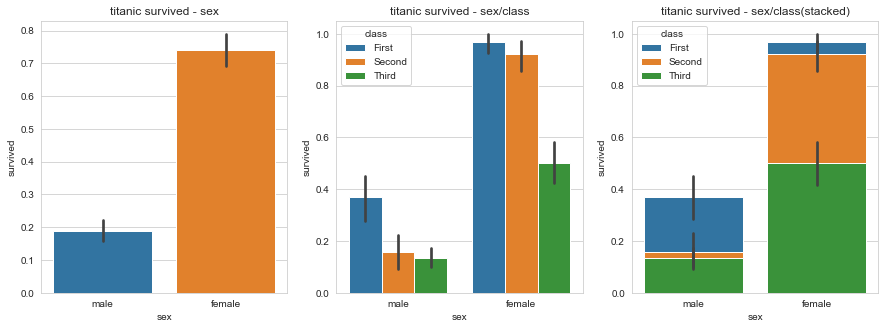

In [12]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style( 'whitegrid' )

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

## 빈도 그래프

- 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 countplot() 함수를 사용한다.

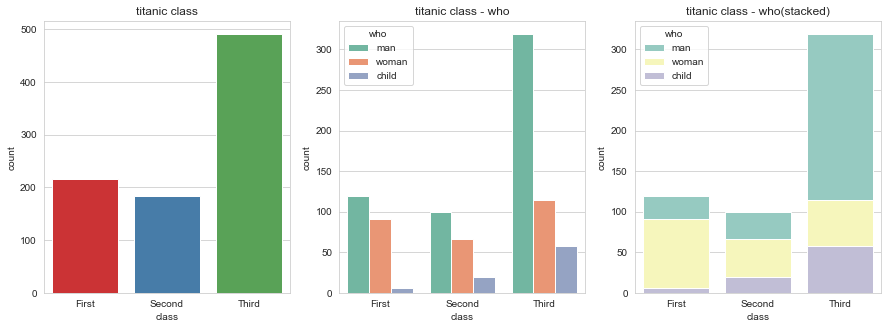

In [13]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

## 박스 플롯/바이올린 그래프

- 박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공한다.
- 다만, 박스 플롯만으로는 데이터가 퍼져 있는 분산의 정도를 정확하게 알기 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있다.
- 박스 플롯은 boxplot() 함수로 그리고 바이올린 그래프는 violinplot() 함수로 그린다.

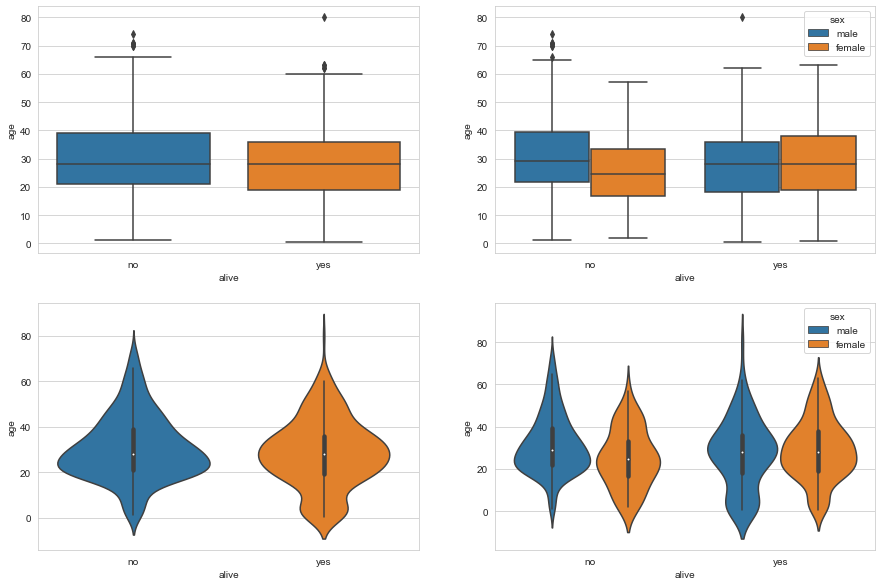

In [14]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

my) 바이올린은 옆으로 퍼진 걸 보여줘서 좀 더 입체적으로 보여주는 것.

## 조인트 그래프

- jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.
- 두 변수의 관계와 데이터가 분산되어 있는 정도를 한 눈에 파악하기 좋다.

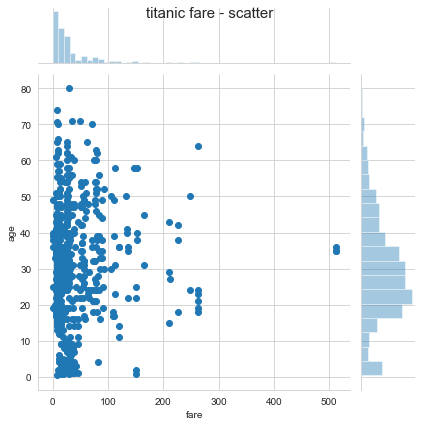

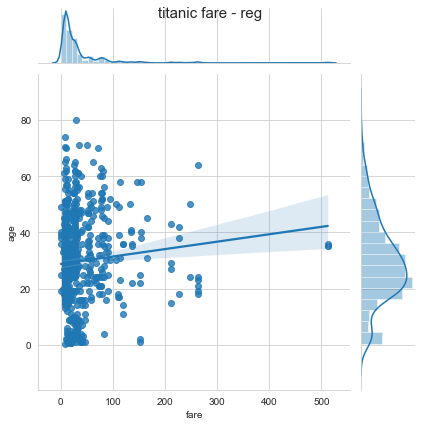

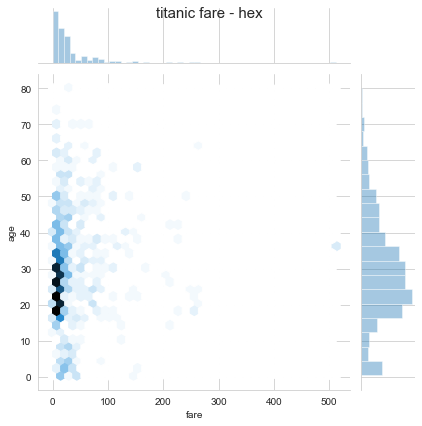

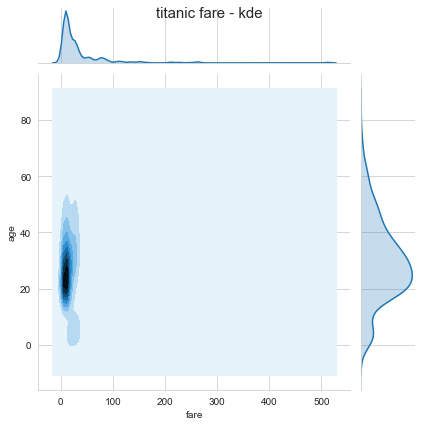

In [15]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()


## 조건을 적용하여 화면을 그리드로 분할

- FaceGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다.
- 각 서브 플롯에 적용할 그래프 종류를 map() 메서드를 이용하여 그리드 객체에 전달한다.

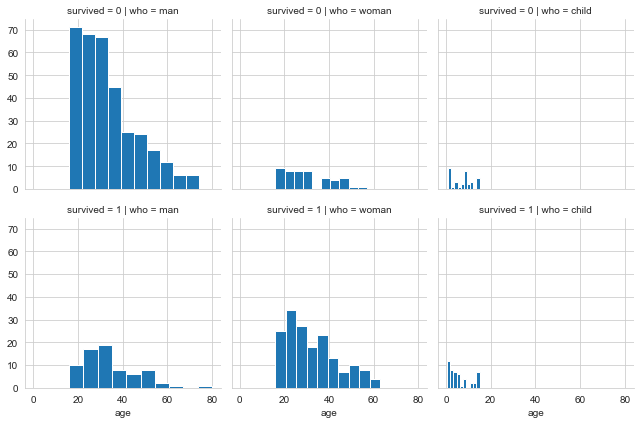

In [16]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')

## 이변수 데이터의 분포

- pairplot() 함수는 인자로 전달되는 데이터프레임의 열( 변수 )을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.
- 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다.

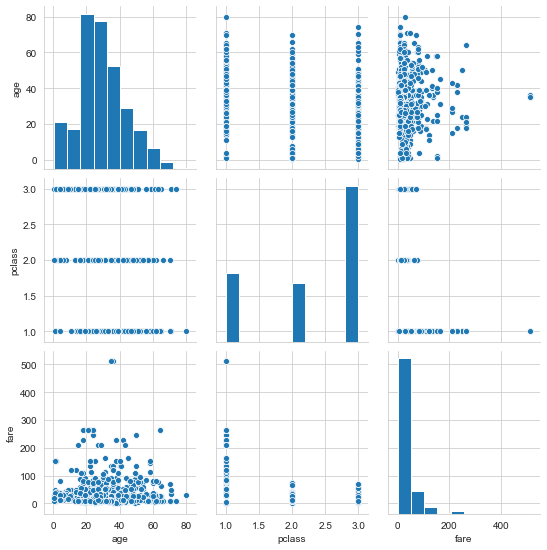

In [17]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)